<a href="https://colab.research.google.com/github/adithyans369/strawberry_model/blob/main/model_code_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!unzip -q strawberry_model.zip -d strawberry_model

replace strawberry_model/strawberry_model/.git/COMMIT_EDITMSG? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [4]:
import shutil
import os

inner_folder = "/content/strawberry_model/strawberry_model"
outer_folder = "/content/dataset"

for item in os.listdir(inner_folder):
    shutil.move(os.path.join(inner_folder, item), outer_folder)

os.rmdir(inner_folder)

In [5]:
import os
import shutil

dataset_folder = "/content/dataset"
ripe_folder = os.path.join(dataset_folder, "ripe")

# Create the 'ripe' folder if it doesn't exist
os.makedirs(ripe_folder, exist_ok=True)

# Move image files that are directly inside /content/dataset to /content/dataset/ripe
for file in os.listdir(dataset_folder):
    file_path = os.path.join(dataset_folder, file)
    # Check if it's a file (not a folder) and likely an image
    if os.path.isfile(file_path) and file.lower().endswith((".jpg", ".jpeg", ".png", ".bmp", ".gif")):
        shutil.move(file_path, ripe_folder)

print("Ripe images moved into /content/dataset/ripe/")


Ripe images moved into /content/dataset/ripe/


In [6]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#NORMALIZATION
image_size = (224, 224)
batch_size = 20
data_dir = '/content/dataset'


datagen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    rotation_range=20,
    zoom_range=0.2,
    width_shift_range=0.1,
    height_shift_range=0.1,
    validation_split=0.2
)

train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

val_generator = datagen.flow_from_directory(
    data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

Found 825 images belonging to 4 classes.
Found 205 images belonging to 4 classes.


In [8]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.regularizers import l2


base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = True
for layer in base_model.layers[:-80]:
    layer.trainable = False

#ADDING CLASSIFICATION LAYER
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.3)(x)
x = Dense(128, activation='relu',kernel_regularizer=l2(0.001))(x)
outputs = Dense(9, activation='softmax',kernel_regularizer=l2(0.001))(x)

model = Model(inputs=base_model.input, outputs=outputs)

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [9]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.regularizers import l2


base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = True
for layer in base_model.layers[:-80]:
    layer.trainable = False

#ADDING CLASSIFICATION LAYER
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.3)(x)
x = Dense(128, activation='relu',kernel_regularizer=l2(0.001))(x)
outputs = Dense(9, activation='softmax',kernel_regularizer=l2(0.001))(x)

model = Model(inputs=base_model.input, outputs=outputs)

In [12]:
model.compile(optimizer=tf.keras.optimizers.Adam(1e-5), loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(train_generator, validation_data=val_generator, epochs=25)

Epoch 1/25


ValueError: Arguments `target` and `output` must have the same shape. Received: target.shape=(None, 4), output.shape=(None, 9)

In [13]:
print("Train classes:", train_generator.num_classes)
print("Validation classes:", val_generator.num_classes)


Train classes: 4
Validation classes: 4


In [14]:
print(train_generator.class_indices)


{'.git': 0, 'ripe': 1, 'turning': 2, 'unripe': 3}


In [15]:
import shutil

shutil.rmtree('/content/dataset/.git', ignore_errors=True)
print("Removed .git folder from dataset.")


Removed .git folder from dataset.


In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = train_datagen.flow_from_directory(
    '/content/dataset',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    '/content/dataset',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)


Found 825 images belonging to 3 classes.
Found 205 images belonging to 3 classes.


In [36]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.regularizers import l2


base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = True
for layer in base_model.layers[:-80]:
    layer.trainable = False

#ADDING CLASSIFICATION LAYER
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.3)(x)
x = Dense(256, activation='relu',kernel_regularizer=l2(0.001))(x)
outputs = Dense(9, activation='softmax',kernel_regularizer=l2(0.001))(x)

model = Model(inputs=base_model.input, outputs=outputs)

In [37]:
import tensorflow as tf

# Load pre-trained base model (example: MobileNetV2)
base_model = tf.keras.applications.MobileNetV2(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet'
)

base_model.trainable = False  # Freeze base model during initial training

# Add custom classification head
x = base_model.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(128, activation='relu')(x)
x = tf.keras.layers.Dropout(0.3)(x)
predictions = tf.keras.layers.Dense(3, activation='softmax')(x)  # ⚠️ Set to 3 classes

# Final model
model = tf.keras.models.Model(inputs=base_model.input, outputs=predictions)


In [38]:
model.compile(optimizer=tf.keras.optimizers.Adam(1e-5),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_generator, validation_data=val_generator, epochs=25)


Epoch 1/25
26/26 ━━━━━━━━━━━━━━━━━━━━ 49s 2s/step - accuracy: 0.5087 - loss: 1.0079 - val_accuracy: 0.6537 - val_loss: 0.9063
Epoch 2/25
26/26 ━━━━━━━━━━━━━━━━━━━━ 44s 2s/step - accuracy: 0.6193 - loss: 0.8753 - val_accuracy: 0.7073 - val_loss: 0.8245
Epoch 3/25
26/26 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.6818 - loss: 0.7428 - val_accuracy: 0.7220 - val_loss: 0.7803
Epoch 4/25
26/26 ━━━━━━━━━━━━━━━━━━━━ 43s 2s/step - accuracy: 0.7291 - loss: 0.7024 - val_accuracy: 0.7220 - val_loss: 0.7501
Epoch 5/25
26/26 ━━━━━━━━━━━━━━━━━━━━ 42s 2s/step - accuracy: 0.7379 - loss: 0.6112 - val_accuracy: 0.6976 - val_loss: 0.7249
Epoch 6/25
26/26 ━━━━━━━━━━━━━━━━━━━━ 81s 2s/step - accuracy: 0.8015 - loss: 0.5621 - val_accuracy: 0.7024 - val_loss: 0.7038
Epoch 7/25
26/26 ━━━━━━━━━━━━━━━━━━━━ 43s 2s/step - accuracy: 0.8036 - loss: 0.5557 - val_accuracy: 0.7024 - val_loss: 0.6842
Epoch 8/25
26/26 ━━━━━━━━━━━━━━━━━━━━ 44s 2s/step - accuracy: 0.8213 - loss: 0.4661 - val_accuracy: 0.6878 - val_loss:

In [39]:
model.save('/content/mobilenetv2_strawberry_classifier.h5')


In [40]:
from tensorflow.keras.models import load_model
model=load_model('/content/mobilenetv2_strawberry_classifier.h5')

In [43]:
from tensorflow.keras.preprocessing import image
import numpy as np

img_path = '/content/5bce7bdf7f546894de41d221ce1d8371-1-_jpg.rf.a416ef58a3b7b5f70a887ce11f4125a0.jpg'#path of test image
img = image.load_img(img_path, target_size=(224, 224))

img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = img_array / 255.0  #NORMALIZATION

In [44]:
predictions = model.predict(img_array)
predicted_class_index = np.argmax(predictions[0])
print("Predicted class index:", predicted_class_index)
class_names = ['ripe', 'unripe', 'turning']
print("Predicted class:", class_names[predicted_class_index])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
Predicted class index: 1
Predicted class: unripe


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
Predicted class index: 1
Predicted class: unripe


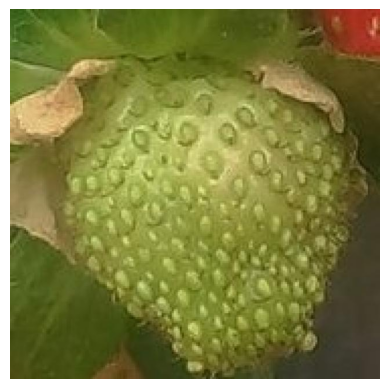

In [46]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import numpy as np
predictions = model.predict(img_array)
predicted_class_index = np.argmax(predictions[0])
print("Predicted class index:", predicted_class_index)
class_names = ['ripe', 'unripe', 'turning']
print("Predicted class:", class_names[predicted_class_index])
plt.imshow(image.load_img(img_path))
plt.axis('off')
plt.show()